In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
from pathlib import Path

In [ ]:
# Helper function to load the npz

def load_data(filepath):
     """ Loads experimental data that has been extracted from an h5 file, preprocessed, and saved. 

    Args:
        filepath (string): path to cleaned data.

    Returns:
        dictionary: data assoiciated with an experiment. Keys include: ['spike_data', 'spike_bin', 'bin_size', 'channelmap',
                            'stim_elecs', 'rec_t_sec', 'samp_rate', 'lsb', 'eventtime', 'event_messages'.]
    """
     
     if not os.path.isfile(filepath):
        raise FileNotFoundError(f"File does not exist: {filepath}")
     return dict(np.load(filepath, allow_pickle=True))

## NPZ structure

Loading an npz returns a dictionary with the following fields:

`spike_data` - numpy structured array with columns: ["frameno", "channel", "amplitude"]

`channelmap` - numpy array of size (n_channels x 5). Columns are index, channel, electrode, x, y. Index correpsonds to the rows in `spike_bin`. x and y are in micrometers. The chip is 200 x 120 electrodes (width x height) and the electrodes are 17.5 micrometers in length. 

`spike_bin` - binned spike data array of size (n_channels x n_bins)

`bin_size` - bin size in seconds used for spike binning

`rec_t_sec` - length of the recording in seconds

`samp_rate` - sampling rate in fps


## Data

All data below is control data and contains no stimulations. Preprocessing includes: applying an amplitude threshold, removing spikes too close together on the same channel, binning spikes. 

The preprocessed npzs are located in the braintrix drive in: `HALnalysis/data/preprocessed/[experiment_id]/[chip]/well[well_no]/`. Below tells you the experiment_id, chip, well, and DIV to locate the recordings.

1. **burstTrainer, M07140, wells 0 & 1, all DIVs**
    - path to raw h5: `braintrix_drive/Experimental Data/FallBUrstM2/Fall_BurstTrainer/`
    - additional preprocessing steps: positive spikes were removed
2. **stimRemovalNull, M07458, all wells, all DIVs**
    - path to raw h5: `braintrix_drive/Experimental Data/stim_removal/null data/`
3. **sydneyDec2024, all chips, all wells, all DIVs**
    - path to raw h5: `braintrix_drive/Experimental Data/SydneyDec2024/wave-training/dec-2024/`
4. **control, all chips, all wells**
    - path to raw h5: `braintrix_drive/DATADATADATA/control/Batch 4-Spring 2024`
5. **stimRemoval, M07471, all wells, DIVs 12, 20, & 23**
    - path to raw h5: `braintrix_drive/DATADATADATA/stim_removal/`

## Example


In [40]:
path_to_braintrix_drive = '/run/user/1001/gvfs/smb-share:server=rstore.it.tufts.edu,share=levinlab_braintrix$/'

In [41]:
path_to_npz = Path(path_to_braintrix_drive) / "HALnalysis" / "data" / "preprocessed" / "burstTrainer" / "M07140" / "well0" / "DIV33_111825_M07140_burstTrainer_well0_exp_data.npz"
exp_data = load_data(path_to_npz)

In [42]:
print(exp_data["spike_data"]["amplitude"][:10])

[-5.8227484e-05 -7.0239126e-05 -2.4923540e-05 -2.7205320e-05
 -3.0270836e-05 -4.9259463e-05 -9.1523616e-05 -9.4112911e-05
 -3.4661873e-05 -1.3517350e-04]


In [43]:
print(exp_data["samp_rate"])

[10000.]


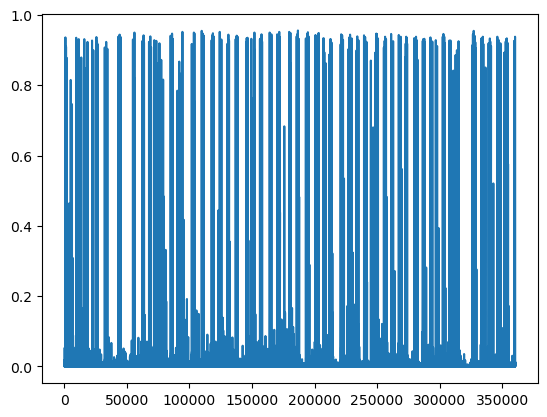

In [44]:
plt.plot(exp_data["spike_bin"].mean(axis=0))